# Phase 3 - Baseline Model

## Imports

In [0]:
from pyspark.sql import types, functions as F
import pandas as pd
import numpy as np
from pyspark.sql.functions import col, max, row_number
from pyspark.sql.window import Window
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

## Configure Databricks blob access

In [0]:
blob_container = "main-storage" # The name of your container created in https://portal.azure.com
storage_account = "team05w261" # The name of your Storage account created in https://portal.azure.com
secret_scope = "team05" # The name of the scope created in your local computer using the Databricks CLI
secret_key = "team05-key" # The name of the secret key created in your local computer using the Databricks CLI 
blob_url = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"
mount_path = "/mnt/mids-w261"

# Configure blob storage account access key globally
spark.conf.set(
  f"fs.azure.account.key.{storage_account}.blob.core.windows.net",
  dbutils.secrets.get(scope = secret_scope, key = secret_key)
)

# df = spark.read.parquet(f"{blob_url}/all_time_full_join_1")
# df = spark.read.parquet(f"{blob_url}/2015_q1_full_join_5")
# df = spark.read.parquet(f"{blob_url}/clean_data_1")
# df = spark.read.parquet(f"{blob_url}/all_time_full_join_2_weather_cleaned")
df = spark.read.parquet(f"{blob_url}/all_time_full_join_6")

df_numrows = df.count()
print(f"number of rows: {df_numrows}")
print(f"number of columns: {len(df.columns)}")
display(df)

number of rows: 31178801
number of columns: 362

YEAR_AIRLNS QUARTER_AIRLNS MONTH_AIRLNS DAY_OF_MONTH_AIRLNS DAY_OF_WEEK_AIRLNS FL_DATE_AIRLNS CRS_DEP_TIME_AIRLNS CRS_ARR_TIME_AIRLNS CRS_ELAPSED_TIME_AIRLNS ORIGIN_AIRLNS DEST_AIRLNS OP_UNIQUE_CARRIER_AIRLNS FLIGHTS_AIRLNS DISTANCE_AIRLNS DEP_DEL15_AIRLNS LATITUDE_WTHR_origin LONGITUDE_WTHR_origin ELEVATION_WTHR_origin LATITUDE_WTHR_dest LONGITUDE_WTHR_dest ELEVATION_WTHR_dest WND_WTHR_direction_angle_origin WND_WTHR_speed_rate_origin CIG_WTHR_ceiling_height_dimension_origin VIS_WTHR_distance_dimension_origin TMP_WTHR_air_temperature_origin DEW_WTHR_dew_point_temperature_origin SLP_WTHR_sea_level_pressure_origin GA1_WTHR_base_height_dimension_origin GF1_WTHR_lowest_cloud_base_height_dimension_origin MA1_WTHR_altimeter_setting_rate_origin MA1_WTHR_station_pressure_rate_origin AA1_WTHR_period_quantity_in_hours_origin AA1_WTHR_depth_dimension_origin AA2_WTHR_period_quantity_in_hours_origin AA2_WTHR_depth_dimension_origin AJ1_WTHR_dimension_origin AJ1_WTHR_equivalent_water_depth_dimension_origin AL1_WTHR_period_quantity_origin AL1_WTHR_depth_dimension_origin AN1_WTHR_period_quantity_origin AN1_WTHR_depth_dimension_origin AO1_WTHR_period_quantity_in_minutes_origin AO1_WTHR_depth_dimension_origin WND_WTHR_direction_angle_dest WND_WTHR_speed_rate_dest CIG_WTHR_ceiling_height_dimension_dest VIS_WTHR_distance_dimension_dest TMP_WTHR_air_temperature_dest DEW_WTHR_dew_point_temperature_dest SLP_WTHR_sea_level_pressure_dest GA1_WTHR_base_height_dimension_dest GF1_WTHR_lowest_cloud_base_height_dimension_dest MA1_WTHR_altimeter_setting_rate_dest MA1_WTHR_station_pressure_rate_dest AA1_WTHR_period_quantity_in_hours_dest AA1_WTHR_depth_dimension_dest AA2_WTHR_period_quantity_in_hours_dest AA2_WTHR_depth_dimension_dest AJ1_WTHR_dimension_dest AJ1_WTHR_equivalent_water_depth_dimension_dest AL1_WTHR_period_quantity_dest AL1_WTHR_depth_dimension_dest AN1_WTHR_period_quantity_dest AN1_WTHR_depth_dimension_dest AO1_WTHR_period_quantity_in_minutes_dest AO1_WTHR_depth_dimension_dest WND_WTHR_type_code_origin-V WND_WTHR_type_code_origin-C WND_WTHR_type_code_origin-N WND_WTHR_type_code_origin-R WND_WTHR_type_code_origin-H CIG_WTHR_ceiling_determination_code_origin-M CIG_WTHR_ceiling_determination_code_origin-C CIG_WTHR_ceiling_determination_code_origin-W CIG_WTHR_CAVOK_code_origin-Y CIG_WTHR_CAVOK_code_origin-N GA1_WTHR_coverage_code_origin-00 GA1_WTHR_coverage_code_origin-01 GA1_WTHR_coverage_code_origin-02 GA1_WTHR_coverage_code_origin-03 GA1_WTHR_coverage_code_origin-04 GA1_WTHR_coverage_code_origin-05 GA1_WTHR_coverage_code_origin-06 GA1_WTHR_coverage_code_origin-07 GA1_WTHR_coverage_code_origin-08 GA1_WTHR_coverage_code_origin-09 GA1_WTHR_coverage_code_origin-10 GA1_WTHR_cloud_type_code_origin-00 GA1_WTHR_cloud_type_code_origin-01 GA1_WTHR_cloud_type_code_origin-02 GA1_WTHR_cloud_type_code_origin-03 GA1_WTHR_cloud_type_code_origin-04 GA1_WTHR_cloud_type_code_origin-05 GA1_WTHR_cloud_type_code_origin-06 GA1_WTHR_cloud_type_code_origin-07 GA1_WTHR_cloud_type_code_origin-08 GA1_WTHR_cloud_type_code_origin-09 GA1_WTHR_cloud_type_code_origin-10 GA1_WTHR_cloud_type_code_origin-12 GA1_WTHR_cloud_type_code_origin-15 GF1_WTHR_total_coverage_code_origin-00 GF1_WTHR_total_coverage_code_origin-01 GF1_WTHR_total_coverage_code_origin-02 GF1_WTHR_total_coverage_code_origin-03 GF1_WTHR_total_coverage_code_origin-04 GF1_WTHR_total_coverage_code_origin-05 GF1_WTHR_total_coverage_code_origin-06 GF1_WTHR_total_coverage_code_origin-07 GF1_WTHR_total_coverage_code_origin-08 GF1_WTHR_total_coverage_code_origin-09 GF1_WTHR_total_lowest_cloud_cover_code_origin-00 GF1_WTHR_total_lowest_cloud_cover_code_origin-01 GF1_WTHR_total_lowest_cloud_cover_code_origin-02 GF1_WTHR_total_lowest_cloud_cover_code_origin-03 GF1_WTHR_total_lowest_cloud_cover_code_origin-04 GF1_WTHR_total_lowest_cloud_cover_code_origin-05 GF1_WTHR_total_lowest_cloud_cover_code_origin-06 GF1_WTHR_total_lowest_cloud_cover_code_origin-07 GF1_WTHR_total_lowest_cloud_cover_code_origin-08 GF1_WTHR_total_lowest_c

In [0]:
%run ./dataclean_functions

In [0]:
categorical_features = [
  'ORIGIN_AIRLNS',
  'DEST_AIRLNS',
  'OP_UNIQUE_CARRIER_AIRLNS',
  'HOLIDAY',
  'Prev_Flight_Delay_15',
  'Enough_Time_Btwn_Estimate_Arrival_and_Planned_Dep'
]

In [0]:
# Inspect the count of each fold - they're pretty even
folds = make_cv_folds(df)

# for train, test in folds:
#   print(train.count())
#   print(test.count())

In [0]:
# Tiny test on the first fold
df_train = undersample(folds[0][0])
df_dev = folds[0][1]

display(df_train)

YEAR_AIRLNS QUARTER_AIRLNS MONTH_AIRLNS DAY_OF_MONTH_AIRLNS DAY_OF_WEEK_AIRLNS FL_DATE_AIRLNS CRS_DEP_TIME_AIRLNS CRS_ARR_TIME_AIRLNS CRS_ELAPSED_TIME_AIRLNS ORIGIN_AIRLNS DEST_AIRLNS OP_UNIQUE_CARRIER_AIRLNS FLIGHTS_AIRLNS DISTANCE_AIRLNS DEP_DEL15_AIRLNS LATITUDE_WTHR_origin LONGITUDE_WTHR_origin ELEVATION_WTHR_origin LATITUDE_WTHR_dest LONGITUDE_WTHR_dest ELEVATION_WTHR_dest WND_WTHR_direction_angle_origin WND_WTHR_speed_rate_origin CIG_WTHR_ceiling_height_dimension_origin VIS_WTHR_distance_dimension_origin TMP_WTHR_air_temperature_origin DEW_WTHR_dew_point_temperature_origin SLP_WTHR_sea_level_pressure_origin GA1_WTHR_base_height_dimension_origin GF1_WTHR_lowest_cloud_base_height_dimension_origin MA1_WTHR_altimeter_setting_rate_origin MA1_WTHR_station_pressure_rate_origin AA1_WTHR_period_quantity_in_hours_origin AA1_WTHR_depth_dimension_origin AA2_WTHR_period_quantity_in_hours_origin AA2_WTHR_depth_dimension_origin AJ1_WTHR_dimension_origin AJ1_WTHR_equivalent_water_depth_dimension_origin AL1_WTHR_period_quantity_origin AL1_WTHR_depth_dimension_origin AN1_WTHR_period_quantity_origin AN1_WTHR_depth_dimension_origin AO1_WTHR_period_quantity_in_minutes_origin AO1_WTHR_depth_dimension_origin WND_WTHR_direction_angle_dest WND_WTHR_speed_rate_dest CIG_WTHR_ceiling_height_dimension_dest VIS_WTHR_distance_dimension_dest TMP_WTHR_air_temperature_dest DEW_WTHR_dew_point_temperature_dest SLP_WTHR_sea_level_pressure_dest GA1_WTHR_base_height_dimension_dest GF1_WTHR_lowest_cloud_base_height_dimension_dest MA1_WTHR_altimeter_setting_rate_dest MA1_WTHR_station_pressure_rate_dest AA1_WTHR_period_quantity_in_hours_dest AA1_WTHR_depth_dimension_dest AA2_WTHR_period_quantity_in_hours_dest AA2_WTHR_depth_dimension_dest AJ1_WTHR_dimension_dest AJ1_WTHR_equivalent_water_depth_dimension_dest AL1_WTHR_period_quantity_dest AL1_WTHR_depth_dimension_dest AN1_WTHR_period_quantity_dest AN1_WTHR_depth_dimension_dest AO1_WTHR_period_quantity_in_minutes_dest AO1_WTHR_depth_dimension_dest WND_WTHR_type_code_origin-V WND_WTHR_type_code_origin-C WND_WTHR_type_code_origin-N WND_WTHR_type_code_origin-R WND_WTHR_type_code_origin-H CIG_WTHR_ceiling_determination_code_origin-M CIG_WTHR_ceiling_determination_code_origin-C CIG_WTHR_ceiling_determination_code_origin-W CIG_WTHR_CAVOK_code_origin-Y CIG_WTHR_CAVOK_code_origin-N GA1_WTHR_coverage_code_origin-00 GA1_WTHR_coverage_code_origin-01 GA1_WTHR_coverage_code_origin-02 GA1_WTHR_coverage_code_origin-03 GA1_WTHR_coverage_code_origin-04 GA1_WTHR_coverage_code_origin-05 GA1_WTHR_coverage_code_origin-06 GA1_WTHR_coverage_code_origin-07 GA1_WTHR_coverage_code_origin-08 GA1_WTHR_coverage_code_origin-09 GA1_WTHR_coverage_code_origin-10 GA1_WTHR_cloud_type_code_origin-00 GA1_WTHR_cloud_type_code_origin-01 GA1_WTHR_cloud_type_code_origin-02 GA1_WTHR_cloud_type_code_origin-03 GA1_WTHR_cloud_type_code_origin-04 GA1_WTHR_cloud_type_code_origin-05 GA1_WTHR_cloud_type_code_origin-06 GA1_WTHR_cloud_type_code_origin-07 GA1_WTHR_cloud_type_code_origin-08 GA1_WTHR_cloud_type_code_origin-09 GA1_WTHR_cloud_type_code_origin-10 GA1_WTHR_cloud_type_code_origin-12 GA1_WTHR_cloud_type_code_origin-15 GF1_WTHR_total_coverage_code_origin-00 GF1_WTHR_total_coverage_code_origin-01 GF1_WTHR_total_coverage_code_origin-02 GF1_WTHR_total_coverage_code_origin-03 GF1_WTHR_total_coverage_code_origin-04 GF1_WTHR_total_coverage_code_origin-05 GF1_WTHR_total_coverage_code_origin-06 GF1_WTHR_total_coverage_code_origin-07 GF1_WTHR_total_coverage_code_origin-08 GF1_WTHR_total_coverage_code_origin-09 GF1_WTHR_total_lowest_cloud_cover_code_origin-00 GF1_WTHR_total_lowest_cloud_cover_code_origin-01 GF1_WTHR_total_lowest_cloud_cover_code_origin-02 GF1_WTHR_total_lowest_cloud_cover_code_origin-03 GF1_WTHR_total_lowest_cloud_cover_code_origin-04 GF1_WTHR_total_lowest_cloud_cover_code_origin-05 GF1_WTHR_total_lowest_cloud_cover_code_origin-06 GF1_WTHR_total_lowest_cloud_cover_code_origin-07 GF1_WTHR_total_lowest_cloud_cover_code_origin-08 GF1_WTHR_total_lowest_c

In [0]:
df_train_ready = df_train.drop('FL_DATE_AIRLNS', *categorical_features)
df_dev_ready = df_dev.drop('FL_DATE_AIRLNS', *categorical_features)

In [0]:
df_train_ready.groupby('dep_del15_airlns').count().show()

+----------------+-------+
dep_del15_airlns| count|
+----------------+-------+
 0.0|2798910|
 1.0|2799842|
+----------------+-------+

In [0]:
# Start putting data into trainable form
from pyspark.ml.feature import VectorAssembler

actual_feature_columns = df_train_ready.columns
actual_feature_columns.remove('DEP_DEL15_AIRLNS')
vectorAssembler = VectorAssembler(inputCols = actual_feature_columns, outputCol = 'features', handleInvalid='skip')
df_train_2 = vectorAssembler.transform(df_train_ready)

df_train_3 = df_train_2.select(['features', 'DEP_DEL15_AIRLNS'])
df_train_3.show(100)

+--------------------+----------------+
 features|DEP_DEL15_AIRLNS|
+--------------------+----------------+
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
(354,[0,1,2,3,4,5...| 0.0|
+--------------------+----------------+
only showing top 100 rows

In [0]:
# Standardization for PCA
from pyspark.ml.feature import StandardScaler
standardScaler = StandardScaler(withMean=True, inputCol='features', outputCol='features_scaled')
scaler = standardScaler.fit(df_train_3)
df_train_4 = scaler.transform(df_train_3).select('features_scaled', 'DEP_DEL15_AIRLNS')

In [0]:
from pyspark.ml.feature import PCA

# Try to perform PCA
pca = PCA(k=100, inputCol='features_scaled', outputCol='features_transformed')
pca_model = pca.fit(df_train_4)
print(pca_model.explainedVariance)

[0.0432938424037541,0.03336043191561789,0.02466543228959305,0.023040737828492416,0.02008535505658403,0.017245703484863758,0.016282164328846858,0.014261700240309962,0.013961528919038305,0.013712872718070044,0.013336697191741867,0.01280963094862937,0.012608629462989497,0.011639915054948168,0.0114886767352694,0.01134981632599021,0.010768770932034266,0.010659644603286167,0.01047636348847711,0.010331151073664202,0.010030938531451056,0.009879178788361663,0.009740221776749828,0.00957219024207574,0.009251284282523482,0.009031563586581335,0.008854552973435497,0.008760760297346579,0.0081420612628616,0.008095552790569312,0.007917463043229375,0.007754625113735207,0.007556611810817972,0.007371497416409748,0.007186341206673342,0.00712414274799596,0.0069494998024514825,0.006897545148194475,0.006630831328014187,0.006434025069081625,0.006284298564909908,0.0062671747084337434,0.0061992411322848075,0.006150240008980422,0.00612555238256203,0.005988225862541973,0.005880697420238845,0.005799744799139156,0.005781844091175156,0.005756392996273692,0.005708770664882502,0.0056376457113148405,0.0056011985006294875,0.005542894788475698,0.005539293564526092,0.005501424730678629,0.0054628013895320635,0.005417917172189572,0.0053874054277792145,0.005371787200543089,0.005353954279627942,0.0053434026439596735,0.005316311739646098,0.00529006570005243,0.005260358235650212,0.005238814144237296,0.005227009393448562,0.005211569459916508,0.005187596051087517,0.0051741430988913855,0.005166382450361857,0.005151814324374607,0.005137328725067715,0.005132441162156141,0.005111493002566498,0.0050981092111138035,0.005087653915294708,0.005083515280669254,0.005066725020035244,0.005030700803292456,0.005015033600509743,0.005014654517448221,0.005014580468928881,0.00501454433791058,0.005013927010816709,0.005012159723482566,0.00500161370528511,0.004994050738797916,0.004972553452619583,0.004950186790697484,0.004928735688729649,0.004917085076917508,0.004879922927524436,0.004864403227790647,0.00485720962693155,0.004813082719386906,0.004788803744611181,0.004770432926166903,0.004763249890949056,0.004738483735988537]

In [0]:
variances = pca_model.explainedVariance

Out[42]:

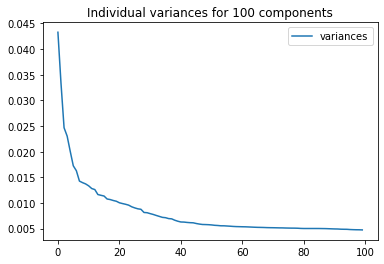

[Text(0.5, 1.0, 'Individual variances for 100 components')]

In [0]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame({'variances': variances}, index=range(len(variances)))

sns.lineplot(data=data).set(title='Individual variances for 100 components')

In [0]:
# for 100 features
sum(variances)

Out[33]: 0.815958605890794

Out[43]:

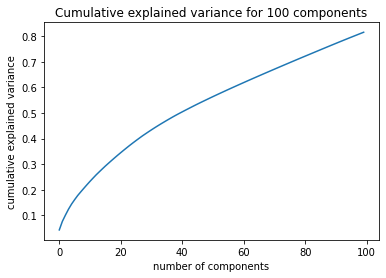

Text(0.5, 1.0, 'Cumulative explained variance for 100 components')

In [0]:
# cumulative explained variance for 100 features
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(variances))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative explained variance for 100 components')

In [0]:
# PCA on 200 features
pca200 = PCA(k=200, inputCol='features_scaled', outputCol='features_transformed')
pca_model200 = pca200.fit(df_train_4)
variances200 = pca_model200.explainedVariance

Out[44]:

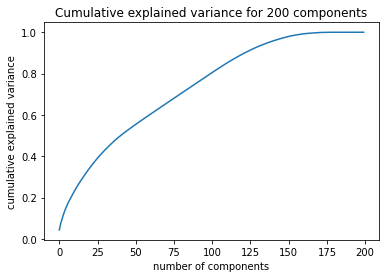

Text(0.5, 1.0, 'Cumulative explained variance for 200 components')

In [0]:
# cumulative explained variance for 200 features
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(variances200))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative explained variance for 200 components')

In [0]:
# Try to perform PCA
pca = PCA(k=40, inputCol='features_scaled', outputCol='features_transformed')
pca_model = pca.fit(df_train_4)

df_train_5 = pca_model.transform(df_train_4)

In [0]:
from pyspark.ml.classification import LogisticRegression

df_train_6 = df_train_5.select(['features_transformed', 'DEP_DEL15_AIRLNS']).withColumnRenamed("DEP_DEL15_AIRLNS", "label").withColumnRenamed("features_transformed", "features")

lr = LogisticRegression(maxIter=15, regParam=0.05, elasticNetParam=0.05)
lrModel = lr.fit(df_train_6)

print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))


Coefficients: [0.042784069853725314,0.007003785467916716,0.016167324929389965,-0.15257008241588635,0.009124138785176227,-0.013465232735731178,0.09796865978709944,0.009403436326971427,0.0,0.0037926013487862838,-0.02407329850031704,0.030975212584200138,-0.04746638918080349,0.02533534910711253,0.010836027483689266,0.04050335324113366,-0.0016123692943744777,-0.00035346418688954665,0.005461622934431422,-0.05080710048287692,0.0,0.0,-0.031431834653893646,0.003453046106300482,0.006799138757930159,0.0,-0.03598450061677243,0.04236379166441879,0.06540497989380824,0.0,-0.06286845478175568,0.020520809821505746,0.0,0.01349712269453448,0.0,0.009839593008692658,-0.00020297637697063486,-0.026386006015581227,0.0,-0.02037124231718919]
Intercept: 0.011624890413291542

In [0]:
vectorAssembler.setHandleInvalid('error')
df_dev_1 = vectorAssembler.transform(df_dev_ready)
df_dev_2 = scaler.transform(df_dev_1)
df_dev_3 = pca_model.transform(df_dev_2)
df_dev_4 = df_dev_3.select(['features_transformed', 'DEP_DEL15_AIRLNS']).withColumnRenamed("DEP_DEL15_AIRLNS", "label").withColumnRenamed("features_transformed", "features")

predictions = lrModel.transform(df_dev_4)

In [0]:
print(lrModel.summary.accuracy)
print(lrModel.summary.precisionByLabel)
print(lrModel.summary.recallByLabel)

0.6138762625664166
[0.6230707987274325, 0.6063624889436598]
[0.5639867432442944, 0.6631340749698754]

In [0]:
lrModel.summary.weightedFMeasure(2.0)

Out[63]: 0.6131596479571095

### Trying to cross validate for some optimal hyperparams

In [0]:
# Optional to explain what these hyperparams do
# lr.explainParam('maxIter')
# lr.explainParam('regParam')

# cross validate for optimal hyperparams
lr = LogisticRegression()
grid = ParamGridBuilder()\
    .addGrid(lr.maxIter, [5, 10, 20])\
    .addGrid(lr.regParam, [.05, .1])\
    .addGrid(lr.elasticNetParam, [0, .5, 1])\
    .build()

# define evaluation metric (AUC and areaUnderPR are the only options...)
bin_eval = BinaryClassificationEvaluator(
    metricName='areaUnderROC' 
    ,labelCol='label'
    )

# perhaps figure out how to customize the folding better for TS data. 
cv = CrossValidator(estimator=lr, evaluator=bin_eval, estimatorParamMaps=grid, numFolds=5)

lr_cv = cv.fit(df_train_transform_ready)

/databricks/spark/python/pyspark/ml/util.py:886: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3816960191369709> in <module> 
 22 lr_cv = cv . fit ( df_train_transform_ready ) 
 23 
 ---> 24 cv_fit . bestModel

 NameError : name 'cv_fit' is not defined

In [0]:
# check out optimal hyperparams
lr_cv.getEstimatorParamMaps()[ np.argmax(lr_cv.avgMetrics) ]

Out[109]: {Param(parent='LogisticRegression_575116da8f57', name='maxIter', doc='max number of iterations (>= 0).'): 20,
 Param(parent='LogisticRegression_575116da8f57', name='regParam', doc='regularization parameter (>= 0).'): 0.05,
 Param(parent='LogisticRegression_575116da8f57', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0}

In [0]:
# build 1 final lr model on optimal hyperparams
# CV so far is saying to use L2 w/ hardly any regularization
lr_final = LogisticRegression(maxIter=20, regParam=.05, elasticNetParam=0)
lr_final = lr_final.fit(df_train_transform_ready)

df_dev_preds = lrModel.transform(df_dev_transform_ready)
df_dev_preds.show(3)

+--------------------+-----+--------------------+--------------------+----------+
 features|label| rawPrediction| probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
[20.0,5.0,2152.0,...| 0.0|[1.00194827037006...|[0.73144145935348...| 0.0|
[21.0,6.0,2149.0,...| 0.0|[0.83859552972119...|[0.69816933590436...| 0.0|
[21.0,6.0,1925.0,...| 0.0|[0.92550838522593...|[0.71616314641257...| 0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 3 rows

In [0]:
# for some reason trying to access these output columns is causing errors i don't understand...
# trying to use this probability to change the threshold of prediction
df_dev_preds.select('probability').collect()
df_dev_preds.select('prediction').collect()

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-3816960191369895> in <module> 
 1 # for some reason trying to access these derived columns is throwing errors... 
 2 # trying to use this probability to change the threshold of prediction 
 ----> 3 df_dev_preds . select ( 'probability' ) . collect ( ) 
 4 df_dev_preds . select ( 'prediction' ) . collect ( ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in collect (self) 
 695 # Default path used in OSS Spark / for non-DF-ACL clusters: 
 696 with SCCallSiteSync ( self . _sc ) as css : 
 --> 697 sock_info = self . _jdf . collectToPython ( ) 
 698 return list ( _load_from_socket ( sock_info , BatchedSerializer ( PickleSerializer ( ) ) ) ) 
 699 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 115 def deco ( * a , ** kw ) : 
 116 try : 
 --> 117 return f ( * a , ** kw ) 
 118 except py4j . protocol . Py4JJavaError as e : 
 119 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling o22914.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 3315.0 failed 4 times, most recent failure: Lost task 3.3 in stage 3315.0 (TID 10967) (10.139.64.32 executor 1): org.apache.spark.SparkException: Failed to execute user defined function(VectorAssembler$$Lambda$1336/53330776: (struct<DAY_OF_MONTH_AIRLNS_double_VectorAssembler_c3842e9f5e05:double,DAY_OF_WEEK_AIRLNS_double_VectorAssembler_c3842e9f5e05:double,DEP_TIME_AIRLNS_double_VectorAssembler_c3842e9f5e05:double,CRS_DEP_TIME_AIRLNS_double_VectorAssembler_c3842e9f5e05:double,CRS_ARR_TIME_AIRLNS_double_VectorAssembler_c3842e9f5e05:double,CRS_ELAPSED_TIME_AIRLNS:double,FLIGHTS_AIRLNS:double,DISTANCE_AIRLNS:double,DISTANCE_GROUP_AIRLNS_double_VectorAssembler_c3842e9f5e05:double,LATITUDE_WTHR_origin:double,LONGITUDE_WTHR_origin:double,ELEVATION_WTHR_origin:double,LATITUDE_WTHR_dest:double,LONGITUDE_WTHR_dest:double,ELEVATION_WTHR_dest:double,liquid_precip_depth_millimeters_origin_double_VectorAssembler_c3842e9f5e05:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:459)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:757)
	at org.apache.spark.sql.execution.collect.UnsafeRowBatchUtils$.encodeUnsafeRows(UnsafeRowBatchUtils.scala:80)
	at org.apache.spark.sql.execution.collect.Collector.$anonfun$processFunc$1(Collector.scala:178)
	at org.apache.spark.scheduler.ResultTask.$anonfun$runTask$3(ResultTask.scala:75)
	at com.databricks.spark.util.ExecutorFrameProfiler$.record(ExecutorFrameProfiler.scala:110)
	at org.apache.spark.scheduler.ResultTask.$anonfun$runTask$1(ResultTask.scala:75)
	at com.databricks.spark.util.ExecutorFrameProfiler$.rec

In [0]:
# see which threshold maximizes F-score
df_f = lr_final.summary.fMeasureByThreshold
df_f.filter(F.col('F-Measure') == df_f.select(F.max(F.col('F-Measure'))).collect()[0][0]).show()

+-------------------+------------------+
 threshold| F-Measure|
+-------------------+------------------+
0.23729186918797662|0.4640472156948467|
+-------------------+------------------+

In [0]:
print(lr_final.summary.accuracy)
print(lr_final.summary.precisionByLabel)
print(lr_final.summary.recallByLabel)
print(lr_final.summary.weightedFMeasure()) # 1 gives regular f1

0.7516258129064533
[0.7519159576540885, 0.7047244094488189]
[0.9975765539674504, 0.01726965750120598]
0.6508178069804746

--------------------------------------------------------------------------- 
 Py4JError Traceback (most recent call last)
 <command-3816960191369729> in <module> 
 3 print ( lr_final . summary . recallByLabel ) 
 4 print ( lr_final . summary . weightedFMeasure ( ) ) # 1 gives regular f1 
 ----> 5 print ( lr_final . summary . weightedFMeasure ( 2 ) ) 

 /databricks/spark/python/pyspark/ml/classification.py in weightedFMeasure (self, beta) 
 395 Returns weighted averaged f - measure . 
 396 """
 --> 397 return self . _call_java ( "weightedFMeasure" , beta ) 
 398 
 399 

 /databricks/spark/python/pyspark/ml/wrapper.py in _call_java (self, name, *args) 
 52 sc = SparkContext . _active_spark_context
 53 java_args = [ _py2java ( sc , arg ) for arg in args ] 
 ---> 54 return _java2py ( sc , m ( * java_args ) ) 
 55 
 56 @ staticmethod

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 115 def deco ( * a , ** kw ) : 
 116 try : 
 --> 117 return f ( * a , ** kw ) 
 118 except py4j . protocol . Py4JJavaError as e : 
 119 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 328 format(target_id, ".", name), value)
 329 else : 
 --> 330 raise Py4JError(
 331 "An error occurred while calling {0}{1}{2}. Trace:\n{3}\n" . 
 332 format(target_id, ".", name, value))

 Py4JError : An error occurred while calling o24885.weightedFMeasure. Trace:
py4j.Py4JException: Method weightedFMeasure([class java.lang.Integer]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:341)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:349)
	at py4j.Gateway.invoke(Gateway.java:286)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

In [0]:
lr_final.summary.weightedFMeasure(2.0)

Out[207]: 0.7068409744943163